In [17]:
# TERA RTX 2050 KA ULTIMATE SPEED CODE (hamesha upar daal dena)
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Image size 192×192 (speed + accuracy ka perfect balance)
# target_size = (192, 192)
# batch_size = 32



In [18]:
import shutil 
shutil.rmtree("/content/small_dataaset", ignore_errors=True)
shutil.rmtree("/content/small_train", ignore_errors=True)
shutil.rmtree("/content/small_val", ignore_errors=True)


In [19]:
import zipfile
import os

zip_path = "brain-tumor-mri-dataset.zip"          # uploaded file ka naam
extract_path = "/content/dataaset" # at whch directory
                                  # we have to extract
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction done! Files are in:", extract_path)

Extraction done! Files are in: /content/dataaset


In [20]:
print(os.listdir(extract_path))

['Testing', 'Training']


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

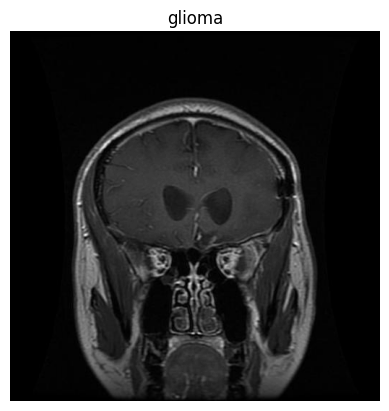

In [22]:
import os, random, matplotlib.pyplot as plt, matplotlib.image as mpimg
G = "/content/dataaset/Training/glioma"
for i in random.sample(os.listdir(G), 1):
    plt.imshow(mpimg.imread(os.path.join(G, i)), cmap='gray')
    plt.title("glioma")
    plt.axis('off')
    plt.show()


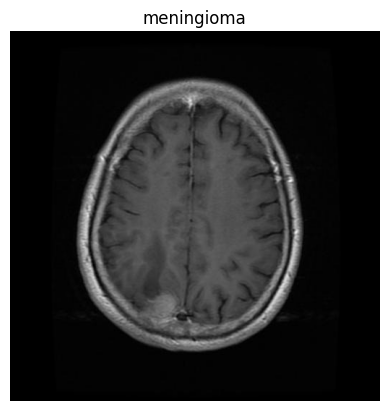

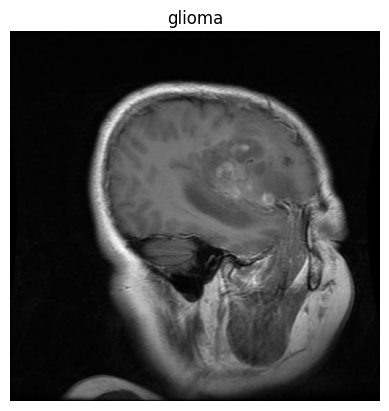

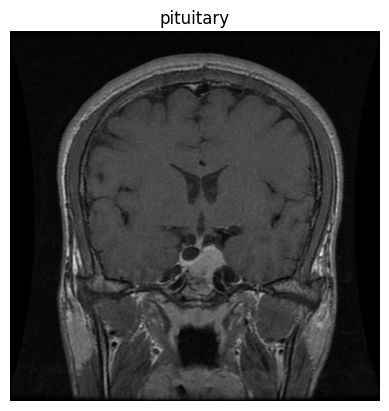

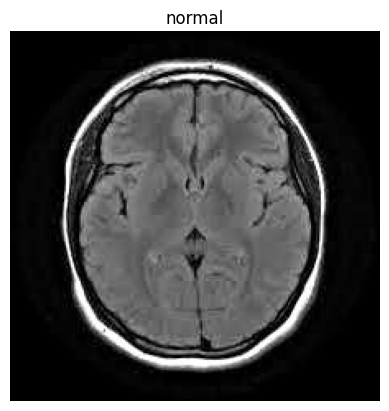

In [23]:
import os, random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 4 class folders ke paths
paths = {
    "meningioma": "/content/dataaset/Training/meningioma",
    "glioma": "/content/dataaset/Training/glioma",
    "pituitary": "/content/dataaset/Training/pituitary",
    "normal": "/content/dataaset/Training/notumor"
}

# Har class se 1 random image display
for label, folder in paths.items():
    img_name = random.choice(os.listdir(folder))       # ek random image
    img_path = os.path.join(folder, img_name)

    img = mpimg.imread(img_path)
    plt.imshow(img, cmap='gray')  # grayscale hai to cmap='gray'
    plt.title(label)
    plt.axis('off')
    plt.show()


In [24]:
# mini batch training ..
# this 250 - 250 dataset we  have assigned into
#  newly made "small datase " folder from
# "content/dataset/training" directory"
import os, random, shutil

classes = ["notumor", "pituitary", "meningioma", "glioma"]
original_base = "/content/dataaset/Training"
subset_base = "/content/small_dataaset"
os.makedirs(subset_base, exist_ok=True)

for cls in classes:
    os.makedirs(os.path.join(subset_base, cls), exist_ok=True)
    images = os.listdir(os.path.join(original_base, cls))
    random.seed(42)   
    selected = random.sample(images, 500)  # 250 images per class
    for img in selected:
        shutil.copy(os.path.join(original_base, cls, img),
                    os.path.join(subset_base, cls, img))


In [25]:
import os

subset_base = "/content/small_dataaset"
classes = ["notumor", "pituitary", "meningioma", "glioma"]

for cls in classes:
    path = os.path.join(subset_base, cls)
    count = len(os.listdir(path))
    print(f"{cls} images:", count)

notumor images: 500
pituitary images: 500
meningioma images: 500
glioma images: 500


In [26]:
from sklearn.model_selection import train_test_split

train_dir = "/content/small_train"
val_dir   = "/content/small_val"

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

for cls in classes:
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(val_dir, cls), exist_ok=True)

    images = os.listdir(os.path.join(subset_base, cls))
    train_imgs, val_imgs = train_test_split(images, test_size=0.2, random_state=42)

    for img in train_imgs:
        shutil.copy(os.path.join(subset_base, cls, img),
                    os.path.join(train_dir, cls, img))
    for img in val_imgs:
        shutil.copy(os.path.join(subset_base, cls, img),
                    os.path.join(val_dir, cls, img))


In [27]:
import os

train_dir = "/content/small_train"
classes = ["notumor", "pituitary", "meningioma", "glioma"]

for cls in classes:
    path = os.path.join(train_dir, cls)
    count = len(os.listdir(path))
    print(f"{cls} train images:", count)


notumor train images: 400
pituitary train images: 400
meningioma train images: 400
glioma train images: 400


In [28]:
import os

val_dir = "/content/small_val"   # tumhara validation directory
classes = ["notumor", "pituitary", "meningioma", "glioma"]

for cls in classes:
    path = os.path.join(val_dir, cls)
    count = len(os.listdir(path))
    print(f"{cls} images in validation:", count)


notumor images in validation: 100
pituitary images in validation: 100
meningioma images in validation: 100
glioma images in validation: 100


# Loading the Dataset and processing

In [29]:
# Step 1: Imports
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
import matplotlib.pyplot as plt

# Step 2: Paths set karo (apne folder ke hisaab se)
train_dir = '/content/small_train'      # example: "dataset/train"
val_dir   = '/content/small_val'         # example: "dataset/val"

# Step 3: Modern way se dataset load karo (ImageDataGenerator ko bhool jao)
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=16,
    label_mode='categorical',    # agar 2 se zyada classes hain
    shuffle=True,
    seed=123
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(224, 224),
    batch_size=16,
    label_mode='categorical',
    shuffle=False
)

# Optional: Validation ko bhi cache kar do speed ke liye
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds   = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 1600 files belonging to 4 classes.
Found 400 files belonging to 4 classes.


# Defining Data Augmentation

In [30]:
# Step 4: Data Augmentation layers banao (ye GPU pe bhi fast chalti hain)
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
])

# Covolution Architecture By Pretrained Model 

In [31]:
# -----------------------------
# Block 7: Base Model + Fine-Tuning
# -----------------------------
from tensorflow.keras import layers, Sequential

#  Callbacks define karo
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=7, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3),
    tf.keras.callbacks.ModelCheckpoint(
        "best_model.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

#  Pretrained EfficientNetB3 load
base_model = tf.keras.applications.EfficientNetB3(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

#  Step 1: Initial Training (Base frozen)
base_model.trainable = False

num_classes = len(os.listdir(train_dir))

model = Sequential([
    layers.Input(shape=(224, 224, 3)),
    data_augmentation,
    layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
], name="Modern_EfficientNet")

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
    callbacks=callbacks
)

# Step 2: Fine-Tuning (unfreeze last 200 layers)
base_model.trainable = True
fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

fine_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=callbacks
)


Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 452ms/step - accuracy: 0.3944 - loss: 1.6209 - val_accuracy: 0.4625 - val_loss: 1.2976 - learning_rate: 5.0000e-04
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 422ms/step - accuracy: 0.4169 - loss: 1.5013 - val_accuracy: 0.5100 - val_loss: 1.2887 - learning_rate: 5.0000e-04
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 425ms/step - accuracy: 0.4269 - loss: 1.4026 - val_accuracy: 0.5425 - val_loss: 1.2476 - learning_rate: 5.0000e-04
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 429ms/step - accuracy: 0.4531 - loss: 1.3421 - val_accuracy: 0.5650 - val_loss: 1.1632 - learning_rate: 5.0000e-04
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 424ms/step - accuracy: 0.4600 - loss: 1.2755 - val_accuracy: 0.4725 - val_loss: 1.1329 - learning_rate: 5.0000e-04
Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.5594 - loss: 1.2123 - val_accuracy: 0.2500 - val_loss: 1.5176 - learning_rate: 1.0000e-04
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step 

In [37]:
# mini batch training ..
# this 250 - 250 dataset we  have assigned into
#  newly made "small datase " folder from
# "content/dataset/training" directory"
import os, random, shutil

classes = ["notumor", "pituitary", "meningioma", "glioma"]
original_base = "/content/dataaset/Testing"
subset_base = "/content/small_test_dataset"
os.makedirs(subset_base, exist_ok=True)

for cls in classes:
    os.makedirs(os.path.join(subset_base, cls), exist_ok=True)
    images = os.listdir(os.path.join(original_base, cls))
    selected = random.sample(images, 300)  # 250 images per class
    for img in selected:
        shutil.copy(os.path.join(original_base, cls, img),
                    os.path.join(subset_base, cls, img))

In [38]:
import os

subset_base = "/content/small_test_dataset"
classes = ["notumor", "pituitary", "meningioma", "glioma"]

for cls in classes:
    path = os.path.join(subset_base, cls)
    count = len(os.listdir(path))
    print(f"{cls} images:", count)

notumor images: 405
pituitary images: 300
meningioma images: 306
glioma images: 300


In [50]:
# Example: force test generator class order same as training
test_generator = test_datagen.flow_from_directory(
    "/content/small_test_dataset",
    target_size=(224,224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False,
    classes = ["notumor", "pituitary", "meningioma", "glioma"] # same order as train
)



Found 1311 images belonging to 4 classes.


In [52]:
import numpy as np

# Predictions
preds = model.predict(test_generator)
pred_classes = np.argmax(preds, axis=1)

# True labels
true_classes = test_generator.classes

# Accuracy
accuracy = np.mean(pred_classes == true_classes) * 100
print(f"Accuracy: {accuracy:.2f}%")


"meningioma": "/content/dataaset/Training/meningioma",
    "glioma": "/content/dataaset/Training/glioma",
    "pituitary": "/content/dataaset/Training/pituitary",
    "normal": "/content/dataaset/Training/notumor"

1311/1311 ━━━━━━━━━━━━━━━━━━━━ 46s 35ms/step
Accuracy: 30.89%


In [45]:
print("Class indices:", test_generator.class_indices)
print("Number of test samples:", test_generator.samples)

Class indices: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
Number of test samples: 1311


# Compiling

In [32]:
# # Step 6: Compile & Train
# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

# # Callbacks (must hai bhai)
# callbacks = [
#     tf.keras.callbacks.EarlyStopping(patience=7, restore_best_weights=True),
#     tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3),
#     tf.keras.callbacks.ModelCheckpoint("best_model.keras", save_best_only=True)
# ]

# # Training shuru!
# history = model.fit(
#     train_ds,
#     validation_data=val_ds,
#     epochs=50,
#     callbacks=callbacks
# )
